<a href="https://colab.research.google.com/github/Aniruddha5164/AirBnb-Bookings-Analysis/blob/main/Air_Bnb_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Aniruddha Banerjee**

# **Project Summary -**

In the project we are analyzing Airbnb’s New York City(NYC) data of 2019. NYC is not only a famous city in the world but also has top global destination for visitors attracted to its museums, entertainment, restaurants, UN offices and commerce.

The project began with a comprehensive understanding of the Airbnb dataset, including data size, information like properties and their availability, price, location, reviews and ratings, exploring data related to Airbnb listings, including the number of properties listed, host characteristics, the variety of amenities available, and the occupancy rate of different properties etc. Further analysis of data to understand the significance of the reviews left by Airbnb users.

Exploratory data analysis projects on Airbnb typically involve investigating patterns and trends in various aspects of the platform, such as pricing, popularity and availability of listings. This data can be used to gain insights into consumer behavior and preferences, as well as to inform marketing and business strategies for hosts and Airbnb as a company. Techniques such as data visualization and objective solution may be used to analyze the data and draw meaningful conclusions.

In this type of analysis, data visualizations such as line plots, scatter plots, and bar charts are used to help identify trends, patterns, and relationships in the data. For instance, a bar chart can be used to show the distribution of properties across different neighbourhoods in a city.

Overall, the exploratory data analysis provides crucial insights for the Airbnb platform to improve customer satisfaction and enhance rental revenues. The insights also benefitted renters who can use the data generated to gain a deeper understanding of the landscape and make informed decisions.

# **GitHub Link -**

https://github.com/Aniruddha5164/AirBnb-Bookings-Analysis/blob/main/Air_Bnb_Bookings.ipynb

# **Problem Statement**


The purpose of this exploratory data analysis project is to analyze and examine the factors that influence customer bookings and preferences. The dataset used in this analysis includes information on customer demographics, subscription room type and location, minimum stays, retention rate and experience with service.

The aim is to identify insights and patterns in the data that can help the company understand the drivers of customer retention and inform future decision-making regarding host listing, location, price and customer service and marketing strategies.

#### **Define Your Business Objective?**

1.   Recommending marketing campaign strategies and predicting the destination neighbourhood which are in high demand.

2.   Using Exploratory Data Analysis, find out the most demanded room type, neighbourhood_group.

3.   Find the average days guests prefer to stay in single visit in different room type in varied neighbourhood_group.

4.   Find out the most sought after Price bracket in which maximum booking happens and get most reviews.

5.   Find the neighbourhood_group in which maximum listings done by top hosts? Specify the reason behind it with your insight.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #for visualization
import seaborn as sns

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

file_path = '/content/drive/MyDrive/Air-Bnb/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Dataset First View

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
airbnb_df.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
airbnb_df.duplicated().sum()
airbnb_df.drop_duplicates(inplace=True)
airbnb_df.shape  #at this point looks like it doesn't have duplicate values

(48895, 16)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = airbnb_df.isnull().sum()
missing_values  #only four columns has null values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The missing values table shows that there are 4 columns containing null values which are name, host_name, last_reviews and reviews_per_month .

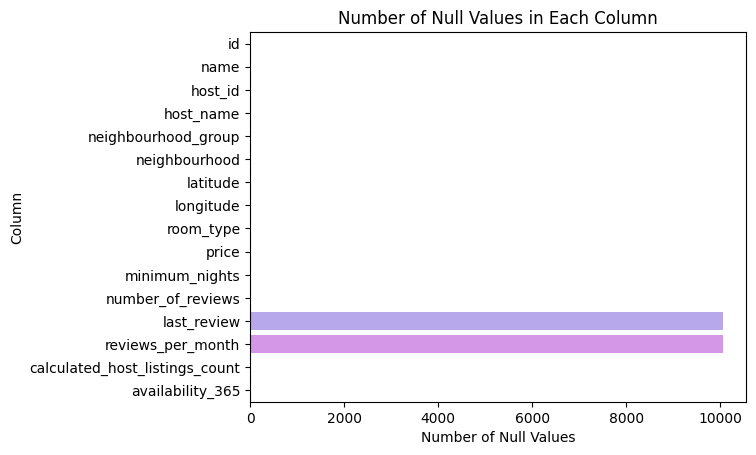

In [ ]:
# Visualizing the missing values
sns.barplot(y=missing_values.index, x=missing_values.values)
plt.title('Number of Null Values in Each Column')
plt.ylabel('Column')
plt.xlabel('Number of Null Values')
plt.show()


### What did you know about your dataset?

We can see our dataset has 48895 rows/indexes and 16 columns/variables. Lets try to understand about the variables we've got here.

1.id : a unique id identifying an airbnb lisitng

2.name : the name of listed properties/room_type on platform

3.host_id : a unique id identifying an airbnb host


4.host_name : name under whom host is registered

5.neighbourhood_group : a group of area

6.neighbourhood : area falls under neighbourhood_group

7.latitude : coordinate of listing

8.longitude : coordinate of listing

9.room_type : type to categorize listing rooms

10.price : price of listing

11.minimum_nights : for the minimum nights required to pay in a single visit

12.number_of_reviews : total count of reviews given by visitors

13.last_review : content of last review given

14.reviews_per_month : checks of per month/reviews given per month

15.calculated_host_listings_count : total no of listing registered under the host

16.availability_365 : the number of days for which a host is available in a year.





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
# We are excluding latitude & longitude as they are coordinates and id & host_id as they're unique, on unique values statistical operations would not give desired insight.
col_after_excluding = set(airbnb_df.columns) - {'latitude', 'longitude', 'id', 'host_id'}
airbnb_df[col_after_excluding].describe()

<ipython-input-11-f782373da153>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  airbnb_df[col_after_excluding].describe()


,reviews_per_month,availability_365,calculated_host_listings_count,minimum_nights,price,number_of_reviews
count,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.373221,112.781327,7.143982,7.029962,152.720687,23.274466
std,1.680442,131.622289,32.952519,20.510550,240.154170,44.550582
min,0.010000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.190000,0.000000,1.000000,1.000000,69.000000,1.000000
50%,0.720000,45.000000,1.000000,3.000000,106.000000,5.000000
75%,2.020000,227.000000,2.000000,5.000000,175.000000,24.000000
max,58.500000,365.000000,327.000000,1250.000000,10000.000000,629.000000


### Variables Description

So, we get to know that some columns falls under categorical and remaining are numeriacal except one last_review comes under Date_Time category.

Categorical variable : name, host_name, neighbourhood_group, neighbourhood, room_type.

Numerical variable : id, host_id, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365

Date_Time variable : last_review

Coordinates : latitude, longitude

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
airbnb_df["id"].nunique()#looks all the property ids are different and each listings are different here!


48895

In [ ]:
airbnb_df["name"].nunique() #shows some listing names are common

47905

In [ ]:
airbnb_df["host_id"].nunique() #shows that as many as 20k host_ids are repeatative

37457

In [ ]:
airbnb_df["host_name"].nunique() #11.5k hosts and 49k listings shows single host have multiple listings.

11452

In [ ]:
airbnb_df["neighbourhood_group"].nunique() #no. of neighbourhood

5

In [ ]:
airbnb_df["neighbourhood_group"].unique() #areas of the city

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
airbnb_df["neighbourhood"].nunique()#no. of neighbourhood

221

In [ ]:
airbnb_df["room_type"].value_counts() #room_type listing count

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
price_value_counts = airbnb_df["price"].value_counts().reset_index()

price_value_counts.sort_values(by="price",ascending=True)   #shows 673 different prices ranging from 0 to 10k

,index,price
673,338,1
562,990,1
561,2850,1
560,1497,1
559,616,1
...,...,...
4,200,1401
3,60,1458
2,50,1534
1,150,2047


In [ ]:
airbnb_df["calculated_host_listings_count"].unique()   #unique no of listings by hosts

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# droping unnecessary columns
airbnb_df.drop(['id','last_review'], axis=1, inplace=True)

In [ ]:
# Examining changes after droping unnecessary columns

airbnb_df.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#We know that reviews_per_month column have many null values, we will replace it with '0'
airbnb_df["reviews_per_month"].fillna(0,inplace=True)

In [ ]:
#And name and host_name also have some empty indexes, replace it with 'Unknown' and 'no_name' resp.
airbnb_df['host_name'].fillna('no_name',inplace=True)
airbnb_df['name'].fillna('Unknown',inplace=True)

In [ ]:
# again examining changes
print(airbnb_df["reviews_per_month"].isnull().sum())
print(airbnb_df["host_name"].isnull().sum())
print(airbnb_df["name"].isnull().sum())

0
0
0


In [ ]:
len(airbnb_df[airbnb_df["availability_365"]==0]) #checking round the year busy properties

17533

In [ ]:
len(airbnb_df[airbnb_df['price']==0])  #some properties have $0 listing price

11

In [ ]:
len(airbnb_df[airbnb_df['price']<10]) #the fare less than $10 doesn't have listings other than $0 Price.

11

In [ ]:
index_names = airbnb_df[(airbnb_df["price"]==0)] # I thought of dropping rows having zero listings price
airbnb_df.drop(index_names.index,inplace=True)


In [ ]:
len(airbnb_df[airbnb_df['price']==0])

0

In [ ]:
len(airbnb_df[airbnb_df['price']>=500])#This shows >=$500 listing price constitutes 2.5% of data, so these values cautiously be considered as outliers.

1235

In [ ]:
airbnb_df.info()  #updated data after dropping zero price rows and filling null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48884 non-null  object 
 1   host_id                         48884 non-null  int64  
 2   host_name                       48884 non-null  object 
 3   neighbourhood_group             48884 non-null  object 
 4   neighbourhood                   48884 non-null  object 
 5   latitude                        48884 non-null  float64
 6   longitude                       48884 non-null  float64
 7   room_type                       48884 non-null  object 
 8   price                           48884 non-null  int64  
 9   minimum_nights                  48884 non-null  int64  
 10  number_of_reviews               48884 non-null  int64  
 11  reviews_per_month               48884 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
airbnb_df["host_name"].value_counts()[:5]#top 5 hosts listing counts in entire dataset

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

In [ ]:
#Maximum listings by hosts in entire dataset with unique listings within neighbourhood_group and this table gives partial answer for 5th objective
hosts_listings = airbnb_df.groupby(['host_name','host_id','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_listings.sort_values(by='calculated_host_listings_count', ascending=False).head(10)

,host_name,host_id,neighbourhood_group,calculated_host_listings_count
33327,Sonder (NYC),219517861,Manhattan,327
4883,Blueground,107434423,Brooklyn,232
4884,Blueground,107434423,Manhattan,232
19037,Kara,30283594,Manhattan,121
19673,Kazuya,137358866,Queens,103
19672,Kazuya,137358866,Manhattan,103
19671,Kazuya,137358866,Brooklyn,103
16604,Jeremy & Laura,16098958,Manhattan,96
33326,Sonder,12243051,Manhattan,96
7827,Corporate Housing,61391963,Manhattan,91


In [ ]:
airbnb_df.loc[(airbnb_df['neighbourhood_group']=='Manhattan') & (airbnb_df['host_name']=='John')]
#Same hosts have many listings in same neighbourhood_groups with different room type or same/different room_type in other neighbporhood

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
429,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,0.19,1,0
1190,Cozy Room in Lively East Village,2267153,John,Manhattan,East Village,40.72760,-73.98347,Private room,72,5,451,5.26,2,13
1535,The heart of the metropolis,3561489,John,Manhattan,East Village,40.72482,-73.98097,Entire home/apt,73,30,100,1.25,1,3
1585,Heart of Harlem 1 BR Garden apt,3726131,John,Manhattan,Harlem,40.80745,-73.94353,Entire home/apt,150,5,17,0.26,2,36
2124,Great Room in Lively East Village,2267153,John,Manhattan,East Village,40.72792,-73.98507,Private room,91,5,395,5.16,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46539,Prime Modern 2 BR East Village Apt nearby Subway,5569222,John,Manhattan,NoHo,40.72896,-73.99201,Entire home/apt,199,2,3,3.00,1,36
47078,Time square Hell’s Kitchen 2bedroom,245518352,John,Manhattan,Hell's Kitchen,40.76135,-73.99343,Entire home/apt,400,3,0,0.00,1,161
47209,Modern Studio Few Steps From Times Square,260807399,John,Manhattan,Hell's Kitchen,40.76536,-73.98866,Shared room,400,2,0,0.00,1,23
47624,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2.00,1,74


### What all manipulations have you done and insights you found?

**From the above experiments we get some more insights like :**
*   Entire home/apt has highest listings.
*   Unique host_name number and above experiment shows that one host have many roomtype and/or more than one listing in same and/or different neighbourhood.
*   Overall listing has distibuted in 5 neighbourhood_group which are having over 200 neighbourhoods. Its price goes upto 10k.
*   After inspection I figured out that a particular property name have one particular host_name hosted by that same individual but a particular host_name can have multiple properties in a neighbourhood_group or neighbourhood.
*   From the unique ids we get to know that all the property ids are different and each listings are different here.
*   By experimenting we get to know that in columns "price" and "availability_365" shows zero cost and not available throughout year respectively. Hosts not available round the justifies but zero Price doesn't.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

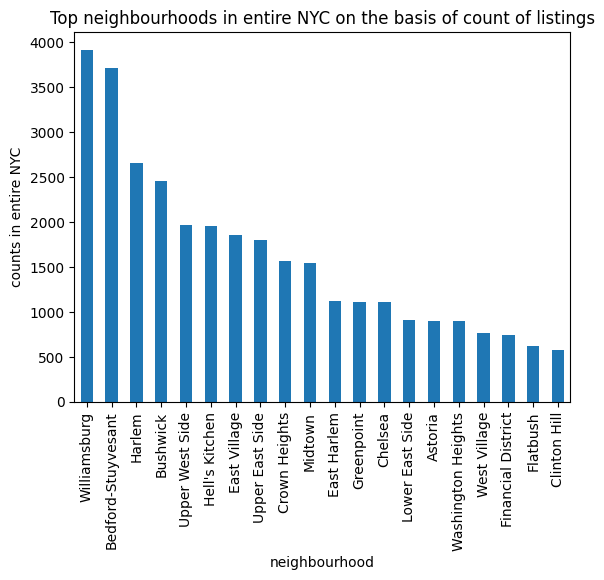

In [ ]:
# Chart - 1 visualization code-Checking top 20 neighbourhoods on the basis of no of listings in entire NYC!
top_20_neigbours=airbnb_df["neighbourhood"].value_counts().head(20)
top_20_neigbours.plot(kind='bar')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

##### 1. Why did you pick the specific chart?
This chart shows the which neighbourhood had most no of booking.

##### 2. What is/are the insight(s) found from the chart?

Williamsburg ,Bedford-Stuyvesant and Harlem are top 3 neighbouhood which has most no of booking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With the help of this data we can find target places to improve services at those and it will also help to get profit by limiting the advertisement market area so we can minimize the cost and increase the profit.

#### Chart - 2

Text(0.5, 1.0, 'average price in different neighbourhood_groups')

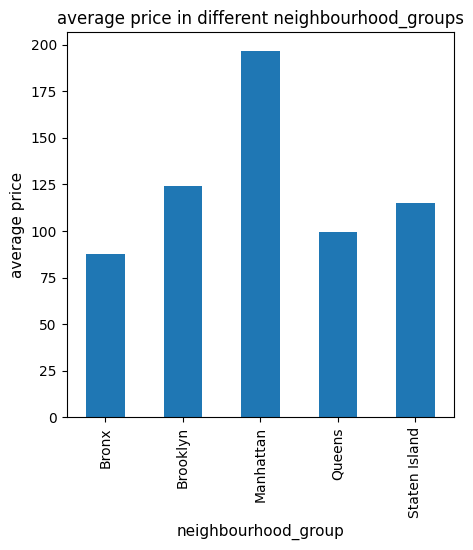

In [ ]:
avg_price = airbnb_df.groupby(["neighbourhood_group"])["price"].mean()
a = avg_price.plot.bar(figsize = (5,5), fontsize = 10)
a.set_xlabel("neighbourhood_group", fontsize = 11)
a.set_ylabel("average price", fontsize = 11)
a.set_title("average price in different neighbourhood_groups", fontsize=12)

##### 1. Why did you pick the specific chart?

This chart shows price difference between the neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Manhattan has the highest average price in the neighbourhood group. This shows the demand for the Manhatten over others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The higher average price shows more listing price can be feasible for making more profit as well as more listings can be done in the high demand neighboourhood. And spend on advertising accordingly.

#### Chart - 3

<Axes: >

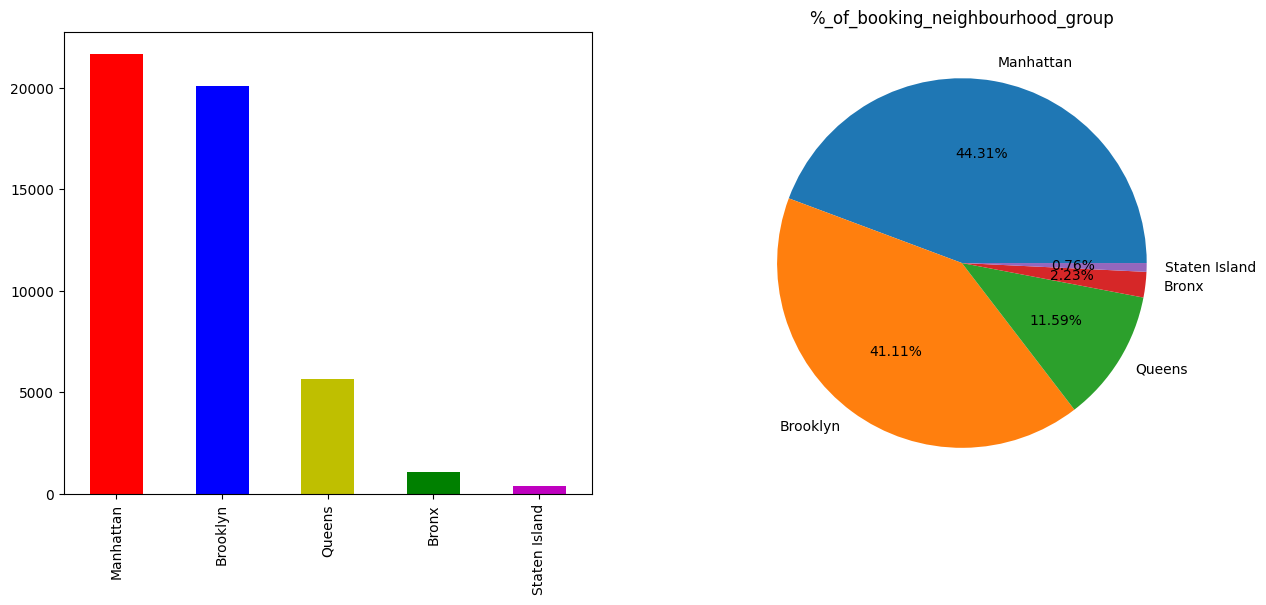

In [ ]:
# Chart - 3 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 22))
ax = axes.flatten()

no_of_booking_neighbourhood_group = airbnb_df["neighbourhood_group"].value_counts()
no_of_booking_neighbourhood_group.plot.pie(autopct='%1.2f%%', ylabel = "",figsize=(8,8), ax=ax[1])
plt.title('%_of_booking_neighbourhood_group', fontsize = 12)

airbnb_df['neighbourhood_group'].value_counts().plot(kind='bar', figsize =(15,6), color=['r','b','y','g','m'], ax=ax[0])

##### 1. Why did you pick the specific chart?

This chart shows the percentages of booking done in different neighbourhood group as well as second chart gives information about which Neighbourhood group has how many bookings.

##### 2. What is/are the insight(s) found from the chart?

This chart shows that only Manhattan and Brooklyn have more than 85% of orders. This way we can list more properties by targetting particular Neighbourhood group at the begining.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help to increase business by targeting particular area of market which have higher number of orders and booking. Keep track of no of listings in the area, keep eye on percentage occupancy to make sure the demand and supply doesn't mismatch.

#### Chart - 4

Text(0.5, 1.0, 'most demanded room type')

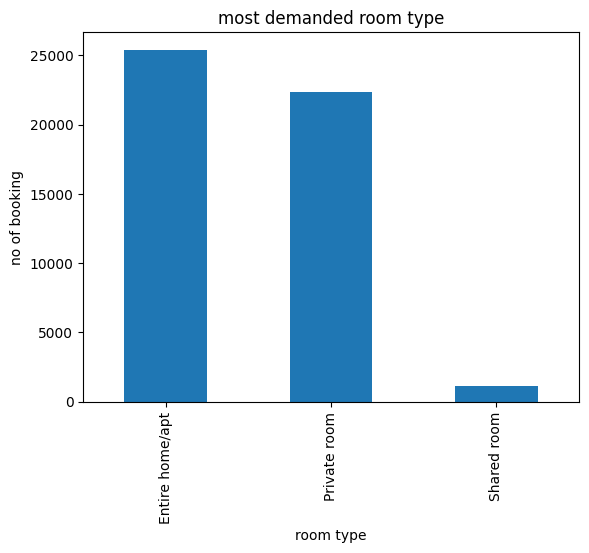

In [ ]:
# Chart - 4 visualization code for finding most demanded room type
most_damand_room = airbnb_df.groupby(['room_type'])["host_id"].count()
most_damand_room.plot(kind="bar")
plt.xlabel("room type")
plt.ylabel("no of booking")
plt.title("most demanded room type")


##### 1. Why did you pick the specific chart?

This chart shows that which room type is in most demand.

##### 2. What is/are the insight(s) found from the chart?

From this chart we found that shared room is least in demand and most demand room type is entire house/apt, people like to rent a entire house/apt followed by shared room. So data suggests to make sure availability and service of demanded room type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It help us to know that most people want entire house/apt for rent so that according to our data we will try to make/list/availability most no. of rental properties as entire house/apt or private rooms.

#### Chart - 5

Text(0.5, 1.0, 'average price in different room type')

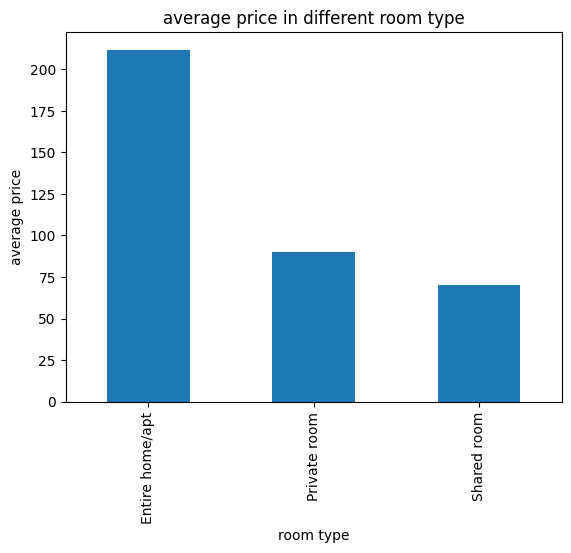

In [ ]:
# Chart - 5 visualization code-this time we will try to find out average prices of different room types

most_damand_room = airbnb_df.groupby(['room_type'])["price"].mean()
most_damand_room.plot(kind="bar")
plt.xlabel("room type")
plt.ylabel("average price")
plt.title("average price in different room type")


##### 1. Why did you pick the specific chart?

To get the idea of average price of room type wrt their demand/occupancy  as showed in earlier one chart.

##### 2. What is/are the insight(s) found from the chart?

This Chart shows shows the average mean price of Entire home/apt is higher as compared to remaining two room types. This also give us profit oriented new listing approach for all stakeholders benefits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This Chart attracts special attention to make sure the avalability as well as best service for this room type for overall positive customer sentiments and good reviews.

#### Chart - 6

Text(0, 0.5, 'Average Stays')

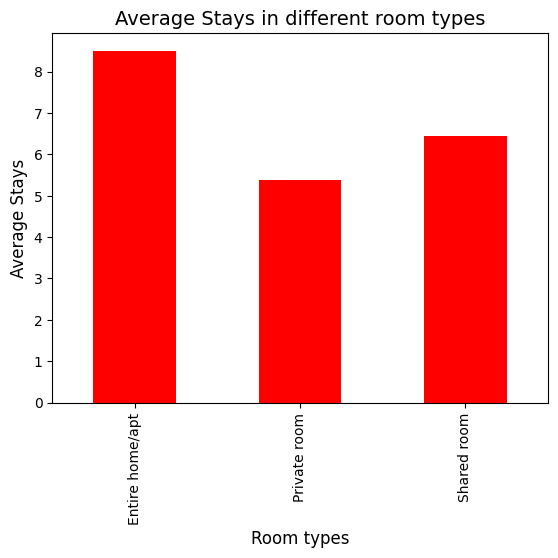

In [ ]:
# Chart - 6 visualization code
avg_stay=airbnb_df.groupby(["room_type"])["minimum_nights"].mean()
avg_stay.plot( kind='bar', color='red')
plt.title('Average Stays in different room types', fontsize = 14)
plt.xlabel('Room types', fontsize = 12)
plt.ylabel('Average Stays', fontsize = 12 )

##### 1. Why did you pick the specific chart?

We choose this chart to show the average nights stays in different room types.

##### 2. What is/are the insight(s) found from the chart?

This chart gives us information about making adequate facilities for average days and when respective room type going to available again for booking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By this chart we can derive business profit by making basic calculations like no of times respective room type can be available for booking in a month and accordingly we have to decide booking price considering expenses.

#### Chart - 7

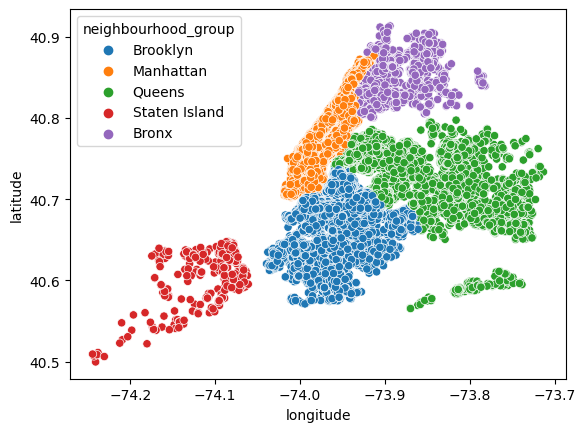

In [ ]:
# Chart - 7 visualization code-visualization of each neighbourhood_group using latitude and longitude
sns.scatterplot(x = airbnb_df["longitude"], y = airbnb_df["latitude"],hue= airbnb_df["neighbourhood_group"])
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the location wrt longitude and latitude of different neighbourhood groups in the city.

##### 2. What is/are the insight(s) found from the chart?

The Scatter plot shows Manhattan and Brooklyn has almost similar longitude that's why they both garner almost 85% of bookings. And Staten Island belongs to outskirts so has less bookings as well as listings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart shows locations nearer to the prime hotspots can garner more bookings hence we try hard to list more number of demanding room type and increase overall revenue by attracting customer.

#### Chart - 8

Text(0.5, 1.0, 'Room Availability throughout Neighbourhood/Room Type')

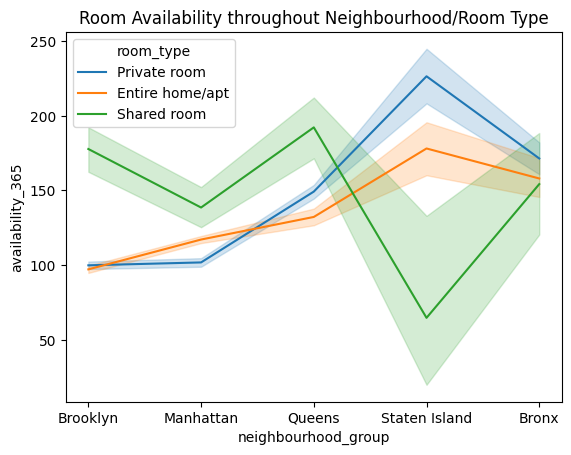

In [ ]:
sns.lineplot(data=airbnb_df,x="neighbourhood_group",y="availability_365",hue="room_type")
plt.title("Room Availability throughout Neighbourhood/Room Type")

In [ ]:
sns.scatterplot(data=airbnb_df, x='price', y='number_of_reviews', hue='room_type', ax=ax[1])
ax[1].set_title('Price vs Number of Reviews')
sns.despine(fig, left=True)

Text(0.5, 1.0, 'Price vs Number of Reviews')

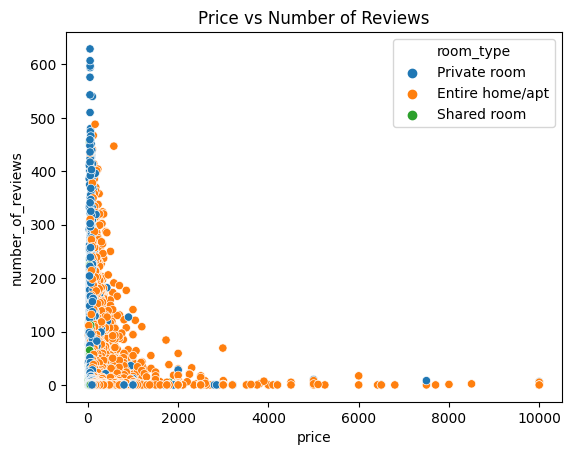

In [ ]:
sns.scatterplot(data=airbnb_df,x="price",y="number_of_reviews",hue="room_type")
plt.title('Price vs Number of Reviews')

##### 1. Why did you pick the specific chart?

 In first chart shows how neighbourhood group is busy or available for booking throughout year. In later we tried to draw relationship between price and no of reviews.

##### 2. What is/are the insight(s) found from the chart?

First chart shows Statan Island is busiest among all even for least demanded shared room and Manhattan and Brroklyn shows descent bookings and availability.

Second chart shows negative relation between Price and no of reviews. Usually cheaper rooms has more occupancy hence more reviews.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

First chart shows Statan Island is busiest among all even for least demanded shared room and Manhattan and Brroklyn shows descent bookings and availability.

Second chart shows negative relation between Price and no of reviews. Usually cheaper rooms has more occupancy hence more reviews.  

#### Chart - 9

Text(0.5, 1.0, 'No. of Properties Available 365 days')

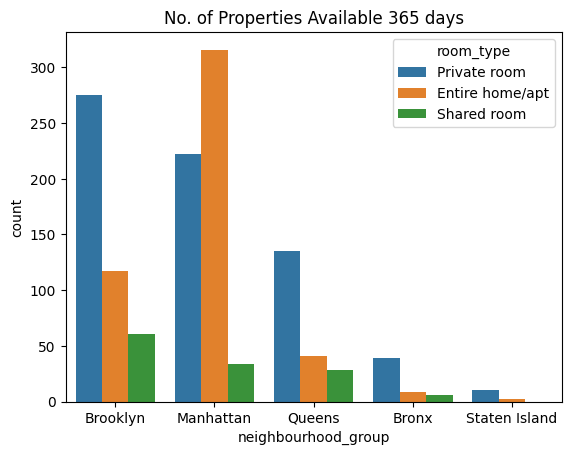

In [ ]:
# Chart - 9 visualization code
properties=airbnb_df[airbnb_df["availability_365"]==365]
sns.countplot(data=properties,x='neighbourhood_group',hue="room_type")
plt.title('No. of Properties Available 365 days',fontsize=12)

##### 1. Why did you pick the specific chart?

This chart will give us idea about availability of room_type in respective neighbourhood group.

##### 2. What is/are the insight(s) found from the chart?

This subplot gives us clear picture i.e. "Trend" of room_type available most during a year. e.g. Private room has most availability round the year except in Manhattan and least availability in Shared room irrespective of Neighbourhood group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above Subplot shows us which room type in which neighbourhood group has most as well as least availability throughout the year. Hence this data can be for listing and delisting demanded and least asked room type resp.

**Negative Insight** - In Manhattan we get to know that Entire home/apt has most availability round the year and in earlier charts we also know that same room_type has most booking but vacancy also most maybe due to more listing of same room_type in the area.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# Chart - average prefered price at every neighbourhood group as per type of room
avg_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.346202,76.545428,50.773723
Manhattan,249.257994,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


<Axes: xlabel='neighbourhood_group'>

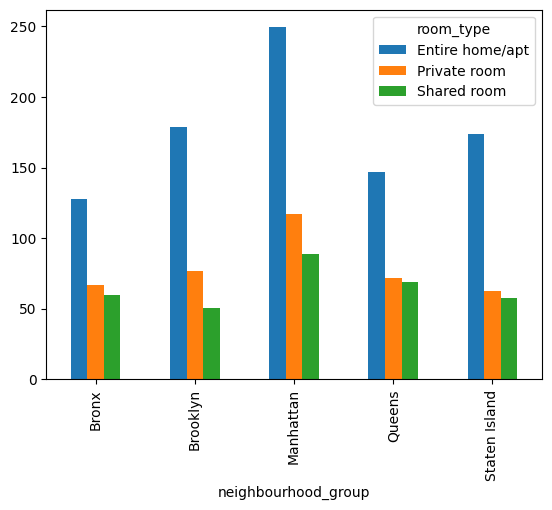

In [ ]:
avg_price_df.plot(kind="bar")

##### 1. Why did you pick the specific chart?

This chart gives us idea about relationship between Price and Room_type in different neighbourhood_group. In this bar plot we are getting the price comparison of each room type in different neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

This chart clearly shows some trends in price and room type wrt neighbourhood groups. This chart shows Entire home/apt has highest average price followed by Private room and Shared room. And this chart also shows Manhattan gives us most average price compared to other neighbourhood groups.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart gives us good business insight about revenue realisation like from which room type and which neighbourhood group are going to give us highest monetary benefits for ultimate goal of profit.

**Negative Insight:** If this chart insight gets to the hosts then they  won't be that much attracted towards low avg room type as well as neighbourhood group, hence business expansion may face hurdle.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
#Busiest_host
busiest_hosts = airbnb_df.groupby(['host_name', 'host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10278,Dona,47621202,Private room,629
17707,Jj,4734398,Private room,607
25565,Maya,37312959,Private room,543
6234,Carol,2369681,Private room,540
8946,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37746,Wanda,792159,Private room,480
22498,Linda,2680820,Private room,474
8624,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


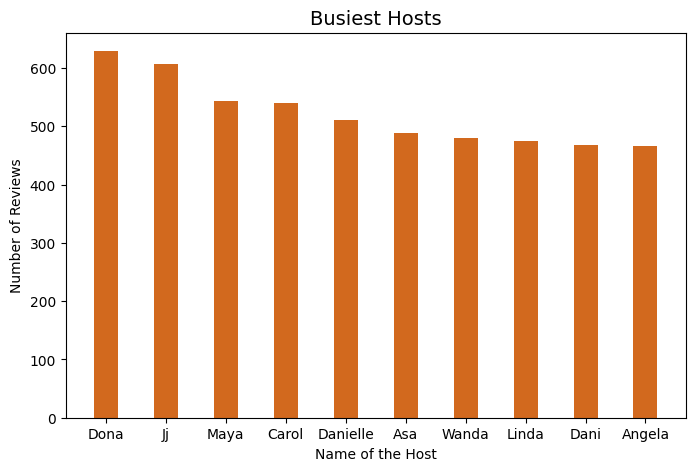

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (8, 5))
plt.bar(name, reviews, color ='chocolate', width = 0.4)
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts", fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

This is best chart which give us idea about which kind of room_type having which facilities attracting most number of customers.

##### 2. What is/are the insight(s) found from the chart?

This chart shows that busiest hosts in top 10 are mostly Private room and few entire home/apt. That shows Private rooms have high frequncy  compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can use busiest hosts experience and their room type for our understanding like locality, facilities, aesthetics, service by which customer getting satisfied and paying more number of visits. Accordingly we can arrange training for our host community for making positive impact like these hosts.

#### Chart - 12

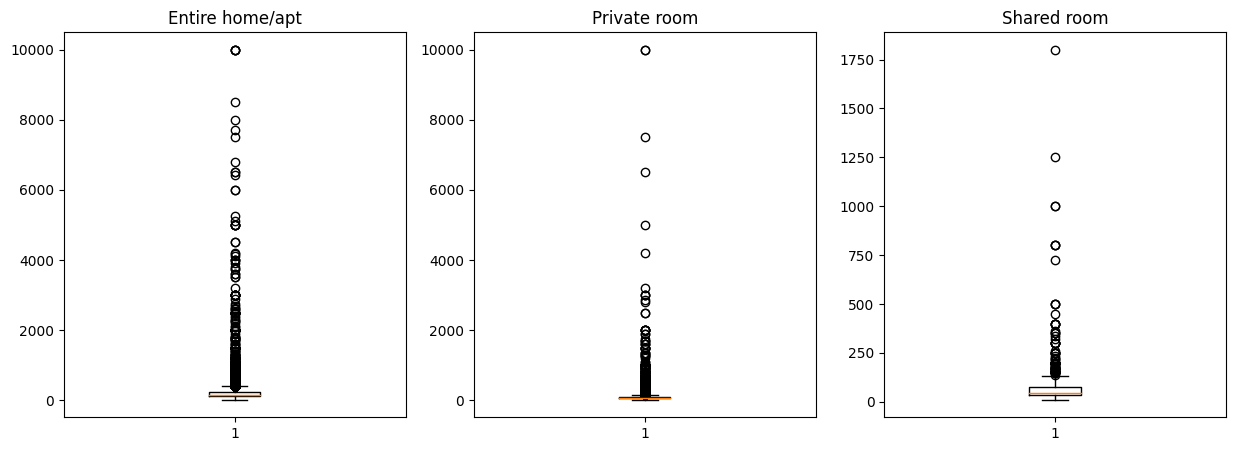

In [ ]:
# Chart - 12 visualization code
entire_home_apt = airbnb_df[airbnb_df['room_type'] == 'Entire home/apt']
private_room = airbnb_df[airbnb_df['room_type'] == 'Private room']
shared_room = airbnb_df[airbnb_df['room_type'] == 'Shared room']

# Create boxplots for price
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].boxplot(entire_home_apt['price'])
axs[0].set_title('Entire home/apt')
axs[1].boxplot(private_room['price'])
axs[1].set_title('Private room')
axs[2].boxplot(shared_room['price'])
axs[2].set_title('Shared room')
plt.show()

In [ ]:
# Remove outliers from price variable for each room_type
def remove_outliers(data):
    Q1 = np.percentile(data['price'], 25)
    Q3 = np.percentile(data['price'], 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data1 = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]
    return data1

entire_home_apt1 = remove_outliers(entire_home_apt)
private_room1 = remove_outliers(private_room)
shared_room1 = remove_outliers(shared_room)

# Combine the datasets in combined_df
combined_df = pd.concat([entire_home_apt1, private_room1, shared_room1], axis=0)

<ipython-input-63-5db40627a655>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_df['price'], ax=ax[1])


<Axes: xlabel='price', ylabel='Density'>

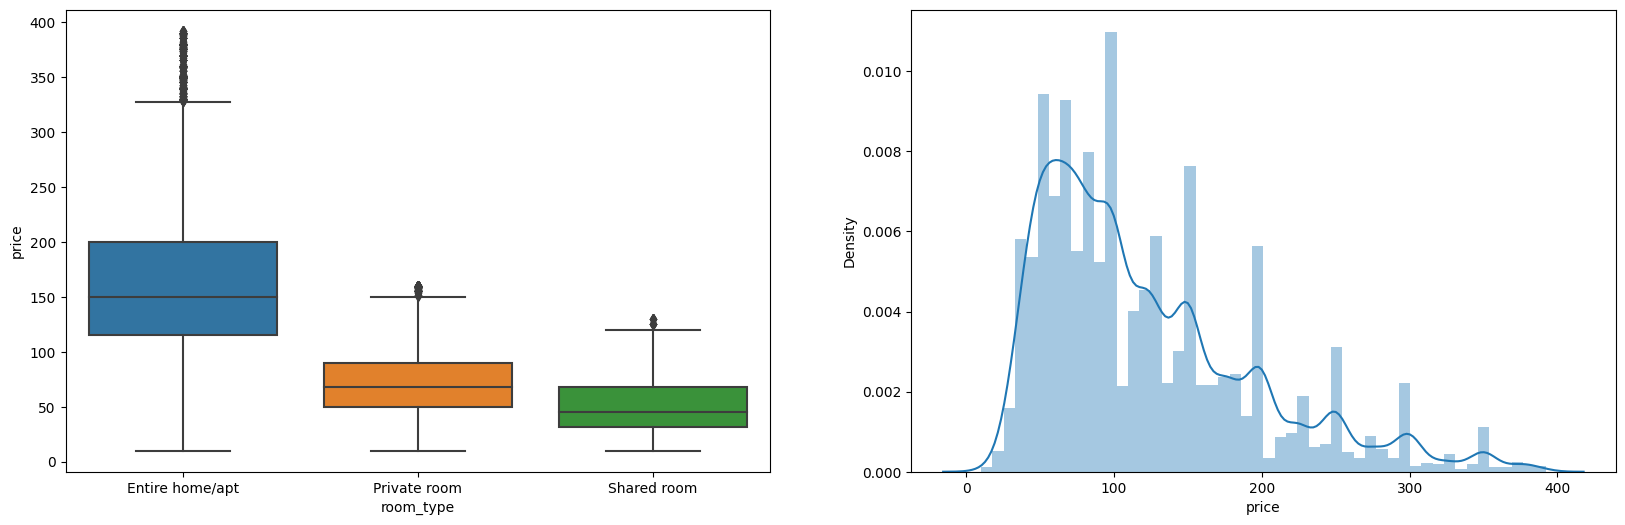

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax = axes.flatten()

# Show the final boxplot without outliers
sns.boxplot(x='room_type', y='price', data=combined_df, ax=ax[0])

#distplot gives us univariate here price distribution of observation.
sns.distplot(combined_df['price'], ax=ax[1])

##### 1. Why did you pick the specific chart?

We chose this graphs to know the Price distribution in overall and within room type.

##### 2. What is/are the insight(s) found from the chart?

From the above three Price graphs gives clearer picture of Min & Max Price, most important it shows us Price density between $1-300 but Price point extends upto 10000 dollar for some properties luxury villas also have customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business point of view we have to list maximum properties in average booking amount of $1-300 to maximize booking frequency for host and also focus on listing of few luxurious properties to fullfill the need of rare but high paying customers.

#### Chart - 13

<Axes: xlabel='neighbourhood_group', ylabel='price'>

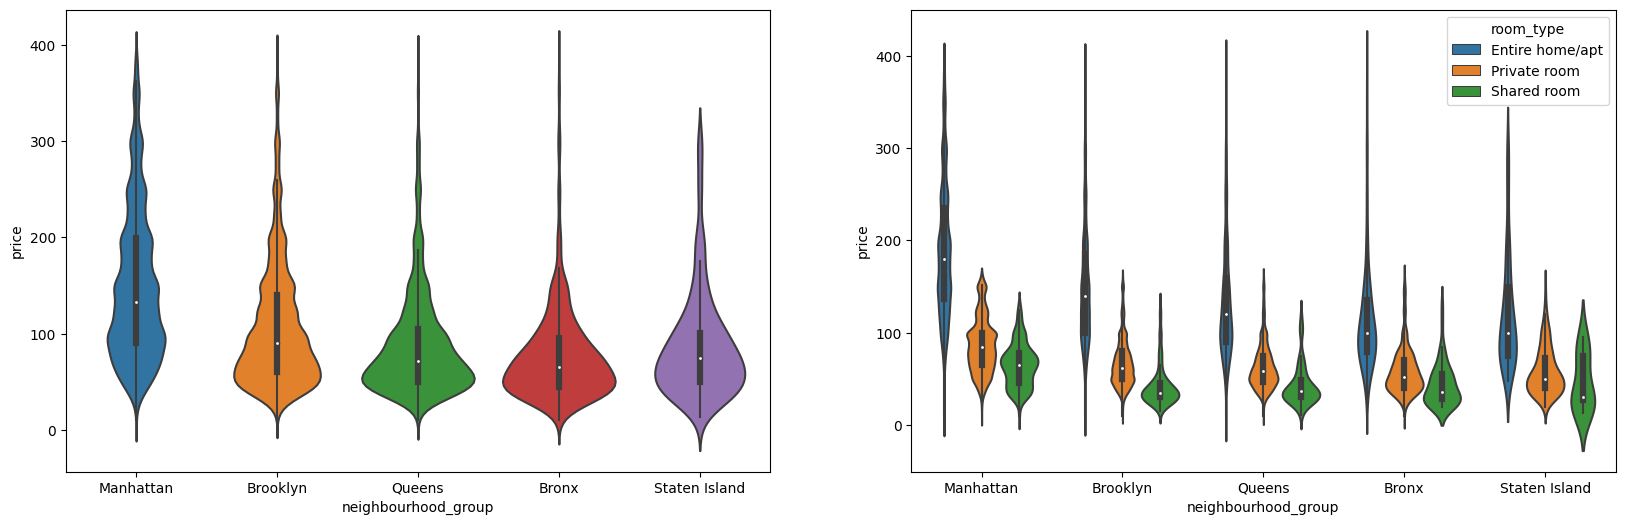

In [ ]:
# Chart - 13 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax = axes.flatten()

sns.violinplot(data=combined_df, x='neighbourhood_group', y='price', ax=ax[0])

sns.violinplot(data=combined_df, x='neighbourhood_group', y='price', hue='room_type')

##### 1. Why did you pick the specific chart?

After lot of deliberations picked the Violinplot to get clearer picture of most demanded price bracket for neighbourhood_group as well as room_type

##### 2. What is/are the insight(s) found from the chart?

Above five violinplot for respective neighbourhood_group shows us that most demanded price range $50-100 in everywhere except Manhattan where considerable booking happens above 100 price as well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company should make adequate listings in demanded price bracket and also above average price range because some Guests are ready to pay for luxury and better services.

Most important 2nd plot shows Private room and Shared room doen't fetch considerable booking beyond this price bracket.

#### Chart - 14 - Correlation Heatmap

<ipython-input-61-6200313d8481>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=airbnb_df.corr(),annot=True,cmap="coolwarm")


<Axes: >

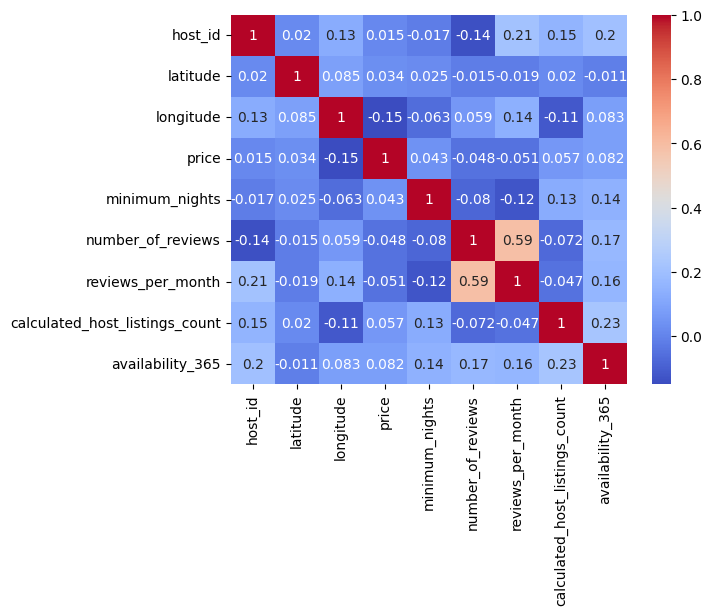

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(data=airbnb_df.corr(),annot=True,cmap="coolwarm")

##### 1. Why did you pick the specific chart?

The Correlation Heatmap shows us visual bi-variate correlation and relationship between numerical columns of Dataframe in the form of colour shades. We get quick visualisation of large amount of data.

##### 2. What is/are the insight(s) found from the chart?

In the Heatmap Matrix some variables with some other have positive correlation and some also have negative correlation. e.g.

Positive corr : Number_of_reviews and reviews_per_month, calculated_host_listings_count and availability_365

Negative corr : price and longitude, number_of_reviews and id, reviews_per_month and minimum_nights

#### Chart - 15 - Pair Plot

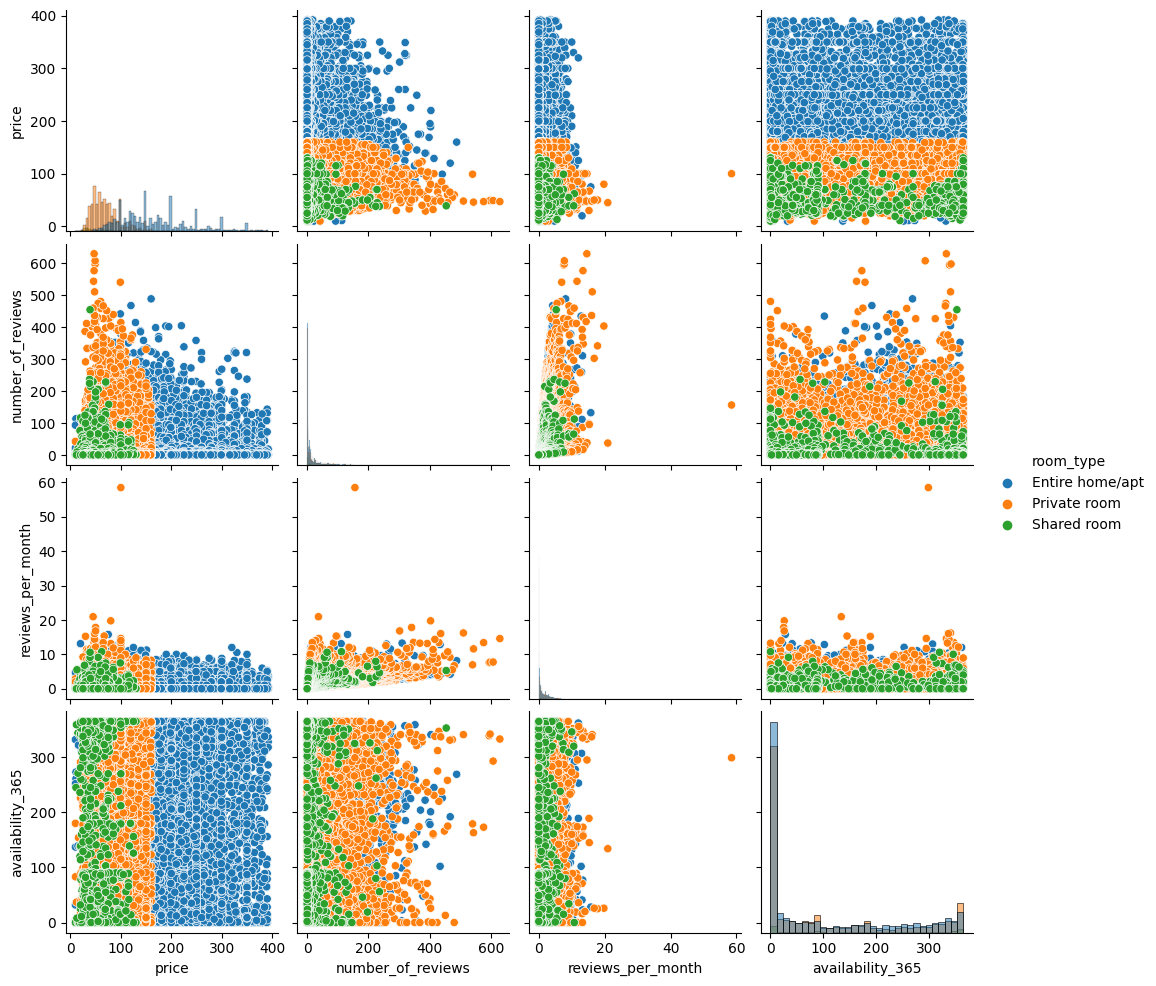

In [ ]:
sns.pairplot(combined_df, hue='room_type',
             x_vars=['price', 'number_of_reviews','reviews_per_month','availability_365'],
             y_vars=['price', 'number_of_reviews','reviews_per_month','availability_365'],
             kind='scatter', diag_kind= 'hist')

##### 1. Why did you pick the specific chart?

The Pair plot is perfect example for showing correlation between any two required numerical variable in given dataset. It gives all considered charts in one grid like Dashboard.

##### 2. What is/are the insight(s) found from the chart?

The relationship between two variables and formation of separated clustres shows some insight like Price and No of reviews have negative relationship, more price less number of reviews per month, reviews per month vs availability_365 shows less than 20 reviews per month, clustre of availability_365 vs price shows entire home/apt properties available for higher prices etc.

Histogram shows every variable has its frequency, distribution and density. Also shows characteristics of skewness.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. We have find out the Top 20 neighbourhoods where number of booking is high, we can focus on those areas for marketting campaigns and advertisements for maximize booking and reduce marketting cost by redcing the focus areas.

2. Most of the guests doesn't prefer shared rooms rather choose entire home/apt and private room. Manhattan and Brooklyn are most demanded neighbourhood groups.

3. The average stays in Entire home/apt, Shared room and Private room are 8, 6 and 5 days approx. resp. Get to know the average number of booking for respective room type in a month.

4. Most subscribed booking price is come within the bracket of $10-400 where almost 95% booking happens as well as most reviews are also given by these guests. One more thing Private room and Entire home/apt gives most number of reviews.

5. Maximum listings done by a top hosts are also concentrated in Manhattan and Brooklyn like higher prices and most bookings.
We can say that hosts are also inclined to Manhattan and Brooklyn due to higher price realisation and more booking as we know from earlier charts; so we can ask more comission from hosts here and realise more profit.

# **Conclusion**

From the above Exploratory Data Analysis of Airbnb Dataset we can conclude that:
* Manhattan and Brooklyn are the two distinguished, expensive & posh areas of NY. Though location of property has high effect on deciding price, but a property in popular location doesn't mean it will stay occupied in most of the time.

* The people who prefer to stay in Entire home or Apartment they are going to stay bit longer and same is the most booked room type in the Neighbourhood group.

* The findings from an exploratory data analysis project on Airbnb can help both hosts and guests make more informed decisions. Hosts can learn more about what amenities guests are looking for and how to price their property competitively. On the other hand, guests can follow some parameteres to make decisions about the location, amenities, and price of properties they want to book.

The given Airbnb Dataset has vast data but lacks in some required features because it is not easy to decide property valuation. Overall, conducting an exploratory data analysis project on Airbnb can provide valuable insights into the dynamics of the short-term rental market and enhance the user experience for both hosts and guests.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***